# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shree\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Checking version of libraries

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.21.5
1.4.2
0.11.2


# Reading the Data

In [3]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

# Analyzing the Data

In [4]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df = df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"])

In [7]:
df.describe()

,v1,v2
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df.isnull()

,v1,v2
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [9]:
df.rename(columns={'v2': 'text'})

,v1,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# Visualization of Data

Text(0, 0.5, 'spam')

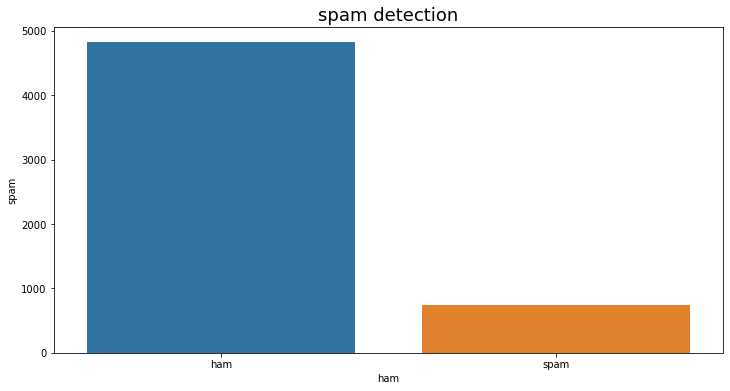

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(x='v1',data=df)
plt.title('spam detection',fontsize=18)
plt.xlabel('ham')
plt.ylabel('spam')

# Data PreProcessing

In [11]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)


In [12]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

'play'

In [13]:
df['transformed_text'] = df['v2'].apply(transform_text)

In [14]:
df.head(5)

,v1,v2,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


# Model Buliding

In [19]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [20]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [21]:
y = df['v1'].values

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2,shuffle=False)

In [25]:
from sklearn.linear_model import LogisticRegression
classify=LogisticRegression()
classify.fit(X_train,y_train)
y_predict=classify.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_predict,y_test)*100
print("Accuracy using logistic regression method is %s"%(acc))

Accuracy using logistic regression method is 95.69506726457399


In [27]:
from sklearn.svm import LinearSVC
linearsvc=LinearSVC(random_state=0)
linearsvc.fit(X_train,y_train)
y_predict=linearsvc.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_predict,y_test)*100
print("Accuracy using linear svc method is",(acc))

Accuracy using linear svc method is 97.39910313901345
